In [26]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import powerlaw

%run backwards_time_voter_model.ipynb

In [27]:
# pip install powerlaw

In [28]:
# Define parameters as in paper
alpha = 3e-4
L = 500

In [ ]:
for i in range(6, 21):
    species = voter_model_fast(L, alpha, kernel='nearest', W=20, eta=-1)
    pickle.dump(species, open(f"{L}x{L},alpha={alpha},kernel=nearest.p_{i}", "wb" ))

  1%|▍                                   | 2812/250000 [00:25<35:23, 116.43it/s]

In [ ]:
species_load = pickle.load(open(f"500x500,alpha=0.0003,kernel=nearest.p_1", "rb" ))
species_ids = np.random.uniform(size=len(species_load))
print(len(species_load))

grid = np.zeros((500, 500))
for i, specie in enumerate(species_load):
    for coord in specie:
        grid[coord] = species_ids[i]

In [ ]:
grids = []

for i in range(1, 5):
    species_load = pickle.load(open(f"{500}x{500},alpha={alpha},kernel=nearest.p_{i}", "rb" ))
    species_ids = np.random.uniform(size=len(species_load))
    print(len(species_load))

    grid = np.zeros((500, 500))
    for i, specie in enumerate(species_load):
        for coord in specie:
            grid[coord] = species_ids[i]
    grids.append(grid)

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(grid)
plt.show()

In [ ]:
n_centers = 10

areas = []
num_species = []

for grid in grids:
    areas, cur_num_species = sa_curve(grid, n_centers)
    num_species = num_species + cur_num_species
    
spec_std_dev = np.std(num_species, axis=0)
spec_mean = np.mean(num_species, axis=0)

In [ ]:
end_1 = 12
start_2 = 40
poly_coeffs_1 = np.polyfit(np.log(areas)[:end_1], np.log(spec_mean)[:end_1], 1)
poly_coeffs_2 = np.polyfit(np.log(areas)[start_2:], np.log(spec_mean)[start_2:], 1)

print(poly_coeffs_1[0], np.exp(poly_coeffs_1[1]))
print(poly_coeffs_2[0], np.exp(poly_coeffs_2[1]))

plt.loglog(areas, list(spec_mean), label='Mean of 10 centers')
plt.loglog([areas[0], areas[end_1]],
           np.exp(poly_coeffs_1[1])*np.array([areas[0], areas[end_1]])**poly_coeffs_1[0],
           linestyle='dashed',
           color='grey')

plt.loglog([areas[start_2], areas[-1]],
           np.exp(poly_coeffs_2[1])*np.array([areas[start_2], areas[-1]])**poly_coeffs_2[0],
           linestyle='dashed',
           color='grey')
plt.fill_between(areas, spec_mean-spec_std_dev, spec_mean+spec_std_dev, alpha=0.2, label='Std. dev')
plt.ylabel('Log Number of Species')
plt.xlabel('Log Area')
plt.title(f'Species area curve for L={L}')
plt.legend()
plt.show()

In [22]:
import powerlaw
import scipy.stats

# Initial estimate of the exponent
exp_est = 0.2

# Initial estimate of x0
x0_est = 0

# Initial estimate of the scale
scale_est = 1

# Perform the fit
pl_fit = scipy.stats.powerlaw.fit(spec_mean[:end_1], exp_est, loc=x0_est, scale=scale_est)


print("Fit:", pl_fit)


Fit: (0.15828049588397003, 0.9999999999999999, 0.07536628665033257)


AttributeError: 'Polygon' object has no property 'normed'

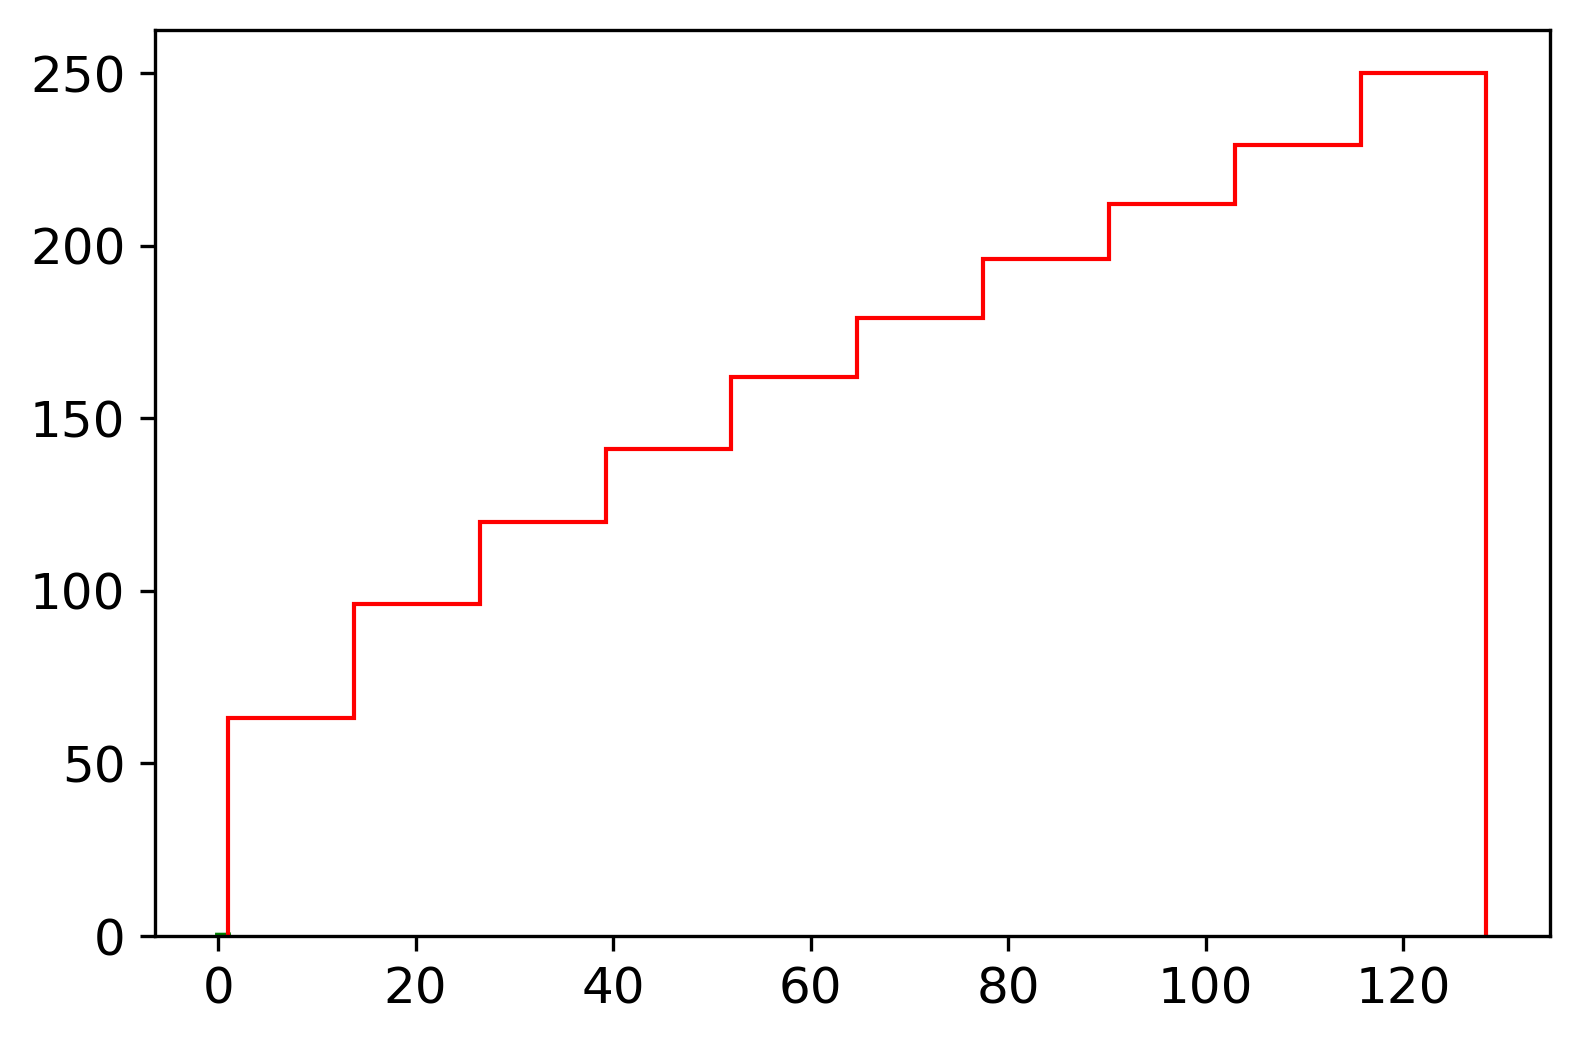

In [23]:
x_arr = np.linspace(0, 1, 100)
plt.plot(x_arr, scipy.stats.powerlaw.cdf(x_arr, *pl_fit), color='g', label='Fit')
plt.hist(spec_mean, cumulative=sum(spec_mean[:end_1]), normed=True, histtype='step', color='r', label='Noise added')
